In [5]:
import time
import random

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as data

from tqdm.notebook import tqdm 

%matplotlib inline
# from IPython.display import set_matplotlib_formats
from matplotlib.colors import to_rgba
# from tqdm.notebook import tqdm  # Progress bar

# set_matplotlib_formats("svg", "pdf")

In [5]:
print('Using torch', torch.__version__)

Using torch 1.9.1


In [6]:
torch.manual_seed(42)

In [14]:
x = torch.Tensor(2, 3, 4)
print(x)

tensor([[[7.2296e+31, 5.6015e-02, 7.0374e+22, 2.3534e+20],
         [7.7782e+31, 7.3154e+34, 5.9682e-02, 4.4721e+21],
         [7.7067e+31, 6.7415e+22, 6.4069e+02, 4.3066e+21]],

        [[6.7331e+22, 6.7120e+22, 1.8515e+28, 7.3867e+20],
         [2.0027e-19, 1.7179e+19, 7.3471e+28, 1.2126e+04],
         [7.1846e+22, 6.9983e+28, 3.1775e+30, 1.8545e+25]]])


In [15]:
x = torch.Tensor([[1, 2],
                  [3, 4]])
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [16]:
x = torch.rand(2, 3, 4)
print(x)

tensor([[[0.2566, 0.7936, 0.9408, 0.1332],
         [0.9346, 0.5936, 0.8694, 0.5677],
         [0.7411, 0.4294, 0.8854, 0.5739]],

        [[0.2666, 0.6274, 0.2696, 0.4414],
         [0.2969, 0.8317, 0.1053, 0.2695],
         [0.3588, 0.1994, 0.5472, 0.0062]]])


In [48]:
print('shape : ', x.shape)
print('size : ', x.size())
print('dims : ', *x.size())

shape :  torch.Size([2, 3, 4])
size :  torch.Size([2, 3, 4])
dims :  2 3 4


In [56]:
np_arr = np.array([[1, 2],
                   [3, 4]])
tensor = torch.from_numpy(np_arr)
print('numpy : ', np_arr)
print('tensor : ', tensor)

numpy :  [[1 2]
 [3 4]]
tensor :  tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


In [57]:
tensor = torch.arange(4)
arr = tensor.numpy()

print(tensor)
print(arr)

tensor([0, 1, 2, 3])
[0 1 2 3]


In [59]:
x = torch.arange(6)
print(x)
x = x.view(2, 3)
print(x)
x = x.permute(1, 0)
print(x)

tensor([0, 1, 2, 3, 4, 5])
tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [71]:
x = torch.Tensor([[[1, 2],
                  [3, 4]],
                  [[5, 6],
                   [7, 8]],
                 [[9, 10],
                  [11, 12]],
                  [[13, 14],
                   [15, 16]]])
print(x)
print(x.shape)
x = x.view(1, 2, 8)
print(x)
print(x.shape)
x = x.permute(2, 0, 1)
print(x)
print(x.shape)

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]],

        [[13., 14.],
         [15., 16.]]])
torch.Size([4, 2, 2])
tensor([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
         [ 9., 10., 11., 12., 13., 14., 15., 16.]]])
torch.Size([1, 2, 8])
tensor([[[ 1.,  9.]],

        [[ 2., 10.]],

        [[ 3., 11.]],

        [[ 4., 12.]],

        [[ 5., 13.]],

        [[ 6., 14.]],

        [[ 7., 15.]],

        [[ 8., 16.]]])
torch.Size([8, 1, 2])


In [2]:
x = torch.ones((3, ))
print(x)
print(x.requires_grad)

tensor([1., 1., 1.])
False


In [5]:
x.requires_grad_(True)
print(x.requires_grad)

True


In [6]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
print('X', x)

X tensor([0., 1., 2.], requires_grad=True)


In [7]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print('Y', y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


In [18]:
y.backward()

In [19]:
x.grad

tensor([1.3333, 2.0000, 2.6667])

In [26]:
gpu_avail = torch.cuda.is_available()
print(f'Is the GPU available? {gpu_avail}')

Is the GPU available? True


In [29]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [30]:
x = torch.zeros(2, 3)
x = x.to(device)
print(x)

tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


In [7]:
random_seed = 42

torch.manual_seed(random_seed)
np.random.seed(random_seed)
random.seed(random_seed)

if torch.cuda.is_available():
    torch.cuda.manual_seed(random_seed)
    torch.cuda.manual_seed_all(random_seed) # if use multi-GPU

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False






In [8]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

In [9]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [10]:
for name, param in model.named_parameters():
    print(f'Parameter {name}, shape {param.shape}')

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


In [11]:
class XORDataset(data.Dataset):
    def __init__(self, size, std=0.1):
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()
    
    def generate_continuous_xor(self):
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) ==1).to(torch.long)
        
        data += self.std * torch.randn(data.shape)
        
        self.data = data
        self.label = label
        
    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

In [12]:
dataset = XORDataset(size=200)
print(f'Size of dataset : {len(dataset)}')
print(f'Data point 0 : {dataset[0]}')

Size of dataset : 200
Data point 0 : (tensor([0.8675, 0.9484]), tensor(0))


In [13]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(data, torch.Tensor):
        label = label.cpu().numpy()
    
    data_0 = data[label==0]
    data_1 = data[label==1]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor='#333', label='Class 0')
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor='#333', label='Class 1')
    
    plt.title('Dataset samples')
    plt.ylabel(r'$x_2$')
    plt.xlabel(r'$x_1$')
    plt.legend()

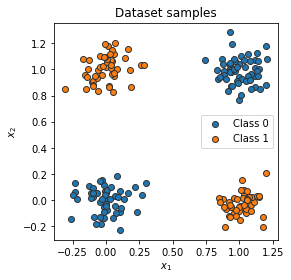

In [14]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [15]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle=True)

In [16]:
data_inputs, data_labels = next(iter(data_loader))

print('Data input', data_inputs.shape, '\n', data_inputs)
print('Data label', data_labels.shape, '\n', data_labels)

Data input torch.Size([8, 2]) 
 tensor([[ 1.1953,  0.2049],
        [-0.1459,  0.8506],
        [-0.1253,  0.1119],
        [ 0.0531, -0.1361],
        [ 0.1345,  0.0127],
        [-0.1449,  0.9395],
        [ 1.0506,  0.9082],
        [ 1.0080,  0.0745]])
Data label torch.Size([8]) 
 tensor([1, 1, 0, 0, 0, 1, 0, 1])


In [17]:
loss_module = nn.BCEWithLogitsLoss()

In [18]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [19]:
train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

In [20]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [21]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    model.train()
    
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            
            preds = model(data_inputs)
            print(preds.shape)
            preds = preds.squeeze(dim=1)
            print(preds.shape)
            
            loss = loss_module(preds, data_labels.float())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

In [22]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([104, 1])
torch.Size([104])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([104, 1])
torch.Size([104])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torch.Size([128])
torch.Size([104, 1])
torch.Size([104])
torch.Size([128, 1])
torch.Size([128])
torch.Size([128, 1])
torc

In [23]:
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 1.8628,  1.7251],
        [-2.6255,  2.0512],
        [-0.1905,  0.1127],
        [-1.6815,  2.4204]], device='cuda:0')), ('linear1.bias', tensor([-0.2069, -0.9411,  0.5876,  0.6650], device='cuda:0')), ('linear2.weight', tensor([[ 2.4035,  2.9415,  0.1604, -2.8211]], device='cuda:0')), ('linear2.bias', tensor([0.5864], device='cuda:0'))])


In [24]:
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

<All keys matched successfully>

In [25]:
print('Original model\n', model.state_dict())
print('\nLoaded model\n', new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[ 1.8628,  1.7251],
        [-2.6255,  2.0512],
        [-0.1905,  0.1127],
        [-1.6815,  2.4204]], device='cuda:0')), ('linear1.bias', tensor([-0.2069, -0.9411,  0.5876,  0.6650], device='cuda:0')), ('linear2.weight', tensor([[ 2.4035,  2.9415,  0.1604, -2.8211]], device='cuda:0')), ('linear2.bias', tensor([0.5864], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[ 1.8628,  1.7251],
        [-2.6255,  2.0512],
        [-0.1905,  0.1127],
        [-1.6815,  2.4204]])), ('linear1.bias', tensor([-0.2069, -0.9411,  0.5876,  0.6650])), ('linear2.weight', tensor([[ 2.4035,  2.9415,  0.1604, -2.8211]])), ('linear2.bias', tensor([0.5864]))])


In [26]:
test_dataset = XORDataset(size=500)

test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [27]:
def eval_model(model, data_loader):
    model.eval()
    true_preds, num_preds = 0.0, 0.0
    
    with torch.no_grad():
        for data_inputs, data_labels, in data_loader:
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds)
            
            pred_labels = (preds >= 0.5).long()
            
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
            
    
    acc = true_preds / num_preds
    print(f'Accuracy of the model : {100*acc:4.2f}%')
    

In [28]:
eval_model(model, test_data_loader)

Accuracy of the model : 100.00%


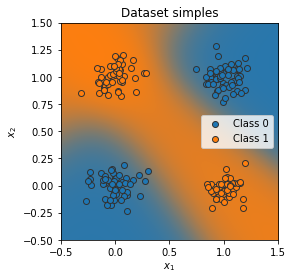

In [68]:
@torch.no_grad()
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label==0]
    data_1 = data[label==1]
    
    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor='#333', label='Class 0')
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor='#333', label='Class 1')
    plt.title('Dataset simples')
    plt.ylabel(r'$x_2$')
    plt.xlabel(r'$x_1$')
    plt.legend()
    
    model.to(device)
    c0 = torch.Tensor(to_rgba('C0')).to(device)
    c1 = torch.Tensor(to_rgba('C1')).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    
    output_image = preds * c0[None, None] + (1 - preds) * c1[None, None]
    output_image = (output_image.cpu().numpy())
    
    plt.imshow(output_image, origin='upper', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    
visualize_classification(model, dataset.data, dataset.label)
plt.show()